In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Описываем физику процесса

In [2]:

Alpha = -2.5

def F(t,p):
    return Alpha*p

P_0 = 1.0

T_min, T_max = 0, 4

Считаем аналитическое решение

In [3]:

@np.vectorize
def clac_analitical_solution(t):
    """ решение для проверки """
    return P_0*np.exp(Alpha*t)

Число шагов решателя

In [4]:
StepsNumber = 100

In [5]:


T = np.linspace(T_min, T_max, StepsNumber+1)

P_cl = np.zeros(StepsNumber+1, dtype=np.float64)
P_an = clac_analitical_solution(T) # сразу считаем аналитическое решение для всех точек.

DeltaT = (T_max-T_min)/StepsNumber


[Text(0.5, 0, 'T'), Text(0, 0.5, 'P')]

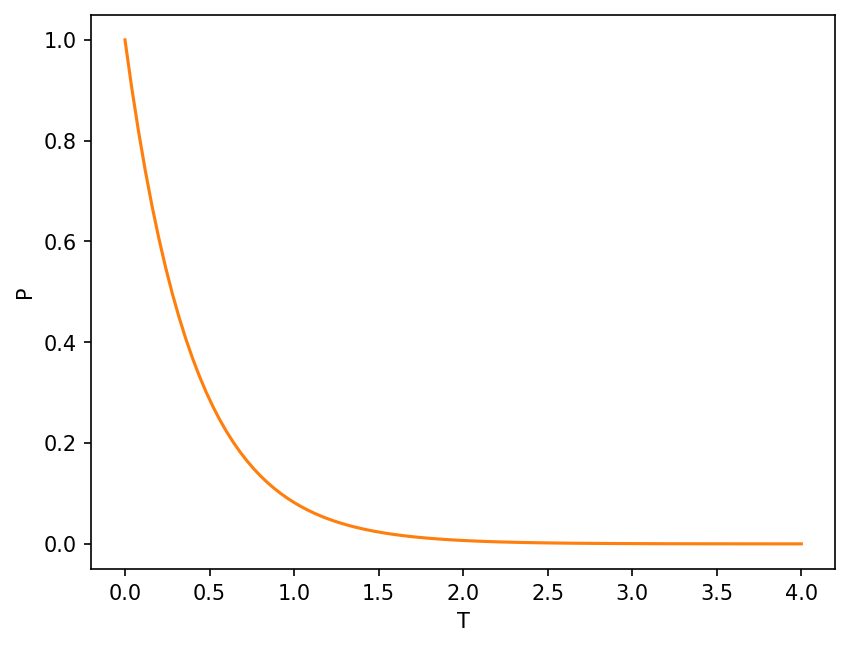

In [6]:

# FIGURE SETUP #

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

fig, ax = plt.subplots()


# за счет посчитанного аналитического решения, график заранее "знает" свою область отображения
LineCalculated = ax.plot(T[0], P_cl[0], label=f'P расчитанное')[0]
LineAnalitical = ax.plot(T, P_an, label=f'P аналитическое')[0]

ax.set(xlabel='T', ylabel='P')


In [7]:


def init_animation():
    """ Инициализация. Установка начального условия. """

    P_cl.fill(0)
    P_cl[0] = P_0

    LineCalculated.set_data(T[:1], P_cl[:1])
    LineAnalitical.set_data(T[:1], P_an[:1])

    return (LineCalculated,LineAnalitical)

In [8]:


def loop_animation(i):
    """ Главный цикл вычисления/анимации """

    P_cl[i+1] = P_cl[i] + F(T[i], P_cl[i]) * DeltaT

    LineCalculated.set_data(T[:i+1], P_cl[:i+1])
    LineAnalitical.set_data(T[:i+1], P_an[:i+1])

    return (LineCalculated,LineAnalitical)

In [9]:

# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150 

ani = animation.FuncAnimation(
    fig=fig, 
    func=loop_animation, 
    init_func=init_animation, 
    frames=StepsNumber, 
#     interval=3000/StepsNumber, 
#     repeat=True, 
#     repeat_delay=1000
)

In [ ]:
from IPython.display import HTML
HTML(ani.to_jshtml())